In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [178]:
data = pd.read_csv("../restaurant_orders.csv")
data["order-time"] = pd.to_datetime(data["order-time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order-time  74818 non-null  datetime64[ns]
 1   product     74818 non-null  object        
 2   price       74818 non-null  float64       
 3   quantity    74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 position in menu by quantity'}, ylabel='quantity'>

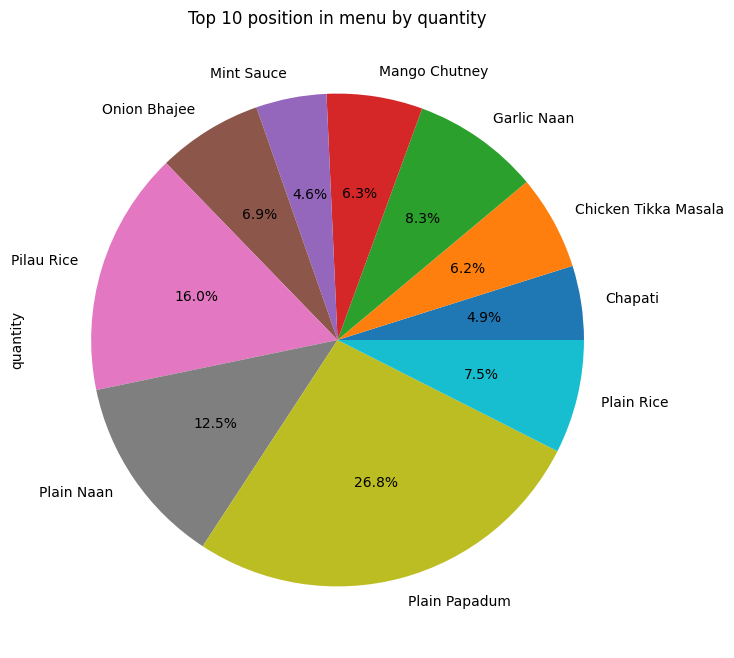

In [100]:
top_products = data[["product", "quantity"]].groupby("product", as_index=False).sum().sort_values("quantity", ascending=False)[:10]
top_products["quantity"].groupby(top_products["product"]).sum().plot.pie(figsize=(10, 8), autopct="%1.1f%%", title="Top 10 position in menu by quantity")


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 profitable products in menu'}, ylabel='item-price'>

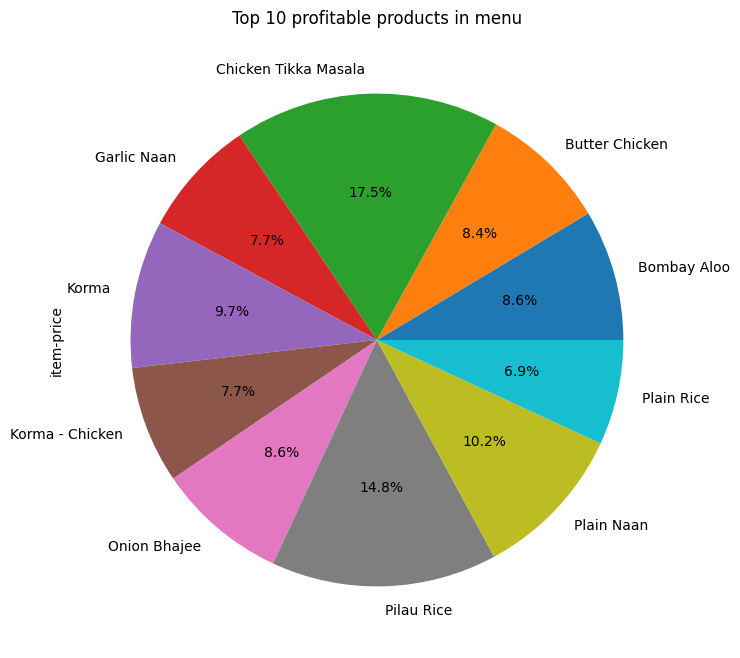

In [106]:
data["item-price"] = data["price"] * data["quantity"]

top_products = data[["product", "item-price"]].groupby("product", as_index=False).sum().sort_values("item-price", ascending=False)[:10]
top_products["item-price"].groupby(top_products["product"]).sum().plot.pie(figsize=(10, 8), autopct="%1.1f%%", title="Top 10 profitable products in menu")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Profit By Order Hour'}, xlabel='order-hour'>

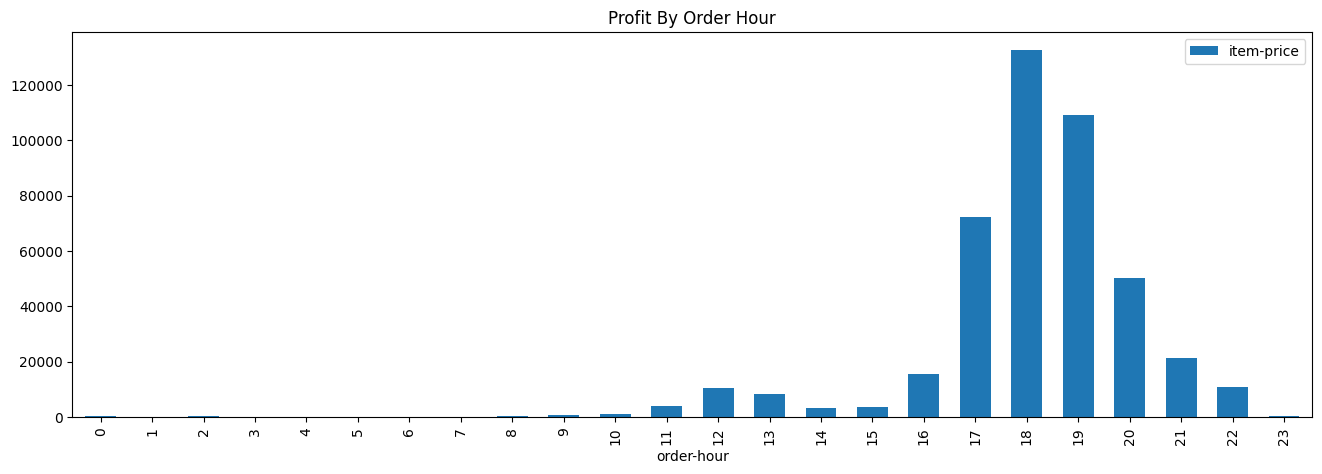

In [173]:
hours = pd.DataFrame({"order-hour": range(24)})

data = hours.merge(data, on="order-hour", how="right").fillna(0)
data["item-price"] = data["price"] * data["quantity"]

top_products = data[["order-hour", "item-price"]].groupby("order-hour", as_index=False).sum().sort_values("order-hour")
top_products.plot(x="order-hour", y="item-price", kind="bar", title="Profit By Order Hour", width=0.6, figsize=(16, 5))


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

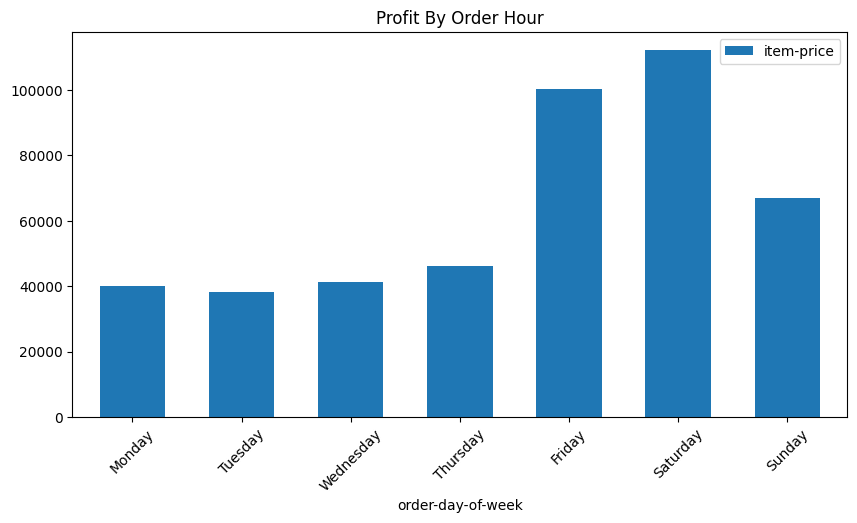

In [206]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data["order-day-of-week"] = data["order-time"].dt.day_name()
data["item-price"] = data["price"] * data["quantity"]

orders = data[["order-day-of-week", "item-price"]].groupby("order-day-of-week", as_index=False).sum().sort_values("order-day-of-week")
orders["order-day-of-week"] = pd.Categorical(orders["order-day-of-week"], categories=days_order, ordered=True)
orders = orders.sort_values("order-day-of-week")

ax = orders.plot(x="order-day-of-week", y="item-price", kind="bar", title="Profit By Order Hour", width=0.6, figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
